In [119]:
import numpy as np
import pandas as pd
from random import random
from random import choices
from math import sqrt
from math import acos

import matplotlib.pyplot as plt

Для начала научимся моделировать в трегуольнике, вершинами которого являются точки (0, 0), (0, 1), (1,0)

In [60]:
def IsoscelsRightTriangleSampling():
    x = random()
    y = random()
    if (x + y > 1):
        x = 1 - x
        y = 1 - y
    return (x, y)

In [ ]:
Теперь, с помощью линейных преобразований будем моделировать распределение в произвольном треугольнике

In [74]:
def TriangleSampling(a, b, c):
    point = IsoscelsRightTriangleSampling()
    x1 = b[0] - a[0]
    x2 = c[0] - a[0]
    y1 = b[1] - a[1]
    y2 = c[1] - a[1]
    point = [ x1 * point[0] + x2 * point[1] + a[0] , y1 * point[0] + y2 * point[1] + a[1]]
    return point
    
    

In [ ]:
Две функции ниже нужны, чтобы считать угол между двумя векторами

In [6]:
def vector_angle_cos(v1, v2):
    dot_prod = v1[0] * v2[0] + v1[1] * v2[1]
    len1 = sqrt(v1[0] ** 2 + v1[1] ** 2)
    len2 = sqrt(v2[0] ** 2 + v2[1] ** 2)
    return dot_prod / (len1 * len2)

In [8]:
def v_angle(v1, v2):
    return acos(vector_angle_cos(v1, v2))

In [ ]:
Функция для нахождения выпуклой оболчки множества точек nodeList, возвращает список пар координат точек, 
которые являются вершинами выпуклой оболочки

In [9]:
def ConvexHull(nodeList):
    size = len(nodeList)
    ind = []
    curr = 0
    for i in range(size):
        if ((nodeList[i][1] < nodeList[curr][1]) or 
           (nodeList[i][1] == nodeList[curr][1] and nodeList[i][0] < nodeList[curr][0])):
            curr = i
    ind.append(curr)
    min_angle = 7
    for i in range(size):
        if (i != ind[0]):
            v1 = [nodeList[i][0] - nodeList[ind[0]][0], nodeList[i][1] - nodeList[ind[0]][1]]
            v2 = [1, 0]
            cos = vector_angle_cos(v1, v2)
            if (v_angle(v1, v2) <min_angle ): 
                min_angle = acos(cos)
                curr = i
    ind.append(curr)
    while True:
        min_angle = 7
        for i in range(size):
            if (i != ind[-1] and i != ind[-2]):
                v1 = [nodeList[ind[-1]][0] - nodeList[ind[-2]][0], nodeList[ind[-1]][1] - nodeList[ind[-2]][1]]
                v2 = [nodeList[i][0] - nodeList[ind[-1]][0], nodeList[i][1] - nodeList[ind[-1]][1]]
                if (v_angle(v1, v2) < min_angle):
                    curr = i
                    min_angle = v_angle(v1, v2)
        if (curr == ind[0]):
            break
        ind.append(curr)
        
    return [nodeList[i] for i in ind]

In [ ]:
Функция для вычисления площади

In [19]:
def triangle_area(nodes):
    v1 = [nodes[1][0] - nodes[0][0], nodes[1][1] - nodes[0][1]]
    v2 = [nodes[2][0] - nodes[0][0], nodes[2][1] - nodes[0][1]]
    return 0.5 * abs(v1[0] * v2[1] - v1[1] * v2[0])

Класс, который осуществляет моделирование равномерного распределения в выпуклом многоугольнике. На вход подается
список вершин, затем строится выпуклая оболочка этого множетсва и строится разбиение на треугольники. 
Моделирование р.р. в многоугольнике осуществляется, как моделирование смеси равномерных распределений 
в трегуольниках. Веса пропорциональны площади треугольников.

draw() отображает множество точек, которые были поданы на вход и их выпуклую оболочку
sample(N, onDraw) генерирует выборку из равномерного распределения в многоугольнике. Если onDraw == True, 
то рисуются точки из выборки и триангуляция.

In [244]:
class PolygonSample:
    def __init__(self, nodeList):
        self.nodes = [node for node in nodeList]
        self.hull = ConvexHull(self.nodes)
        self.triangles = [(self.hull[0], self.hull[i], self.hull[i + 1]) for i in range(1, len(self.hull) -1)]
        self.weights = []
        area_sum = 0
        for tr in self.triangles:
            area = triangle_area(tr)
            area_sum += area
            self.weights.append(area)
        ws = np.sum(np.array(self.weights))
        self.weights = [x / ws for x in self.weights]
        
    def draw(self):
        plt.figure(figsize = (8, 8))
        x = [v[0] for v in self.nodes]
        y = [v[1] for v in self.nodes]
        plt.plot(x, y, 'o') 
        hull_ = [v for v in self.hull]
        hull_.append(hull_[0])
        plt.plot([v[0] for v in hull_], [v[1] for v in hull_])
            
    def sample(self, N, onDraw = False):
        ans = []
        T = choices(self.triangles, weights = self.weights, k = N)
        for x in T:
            ans.append(TriangleSampling(x[0], x[1], x[2]))
        if onDraw:
            x = [v[0] for v in ans]
            y = [v[1] for v in ans]
            plt.figure(figsize = (10, 10))
            plt.plot(x, y, 'o')
            for tr in self.triangles:
                x = [A[0] for A in tr]
                x.append(tr[0][0])
                y = [A[1] for A in tr]
                y.append(tr[0][1])
                plt.plot(x, y)
        return ans

Пример для малого числа точек

In [221]:
n1 = 20
vertices_small = [(random() * 100, random() * 100) for _ in range(n1)]

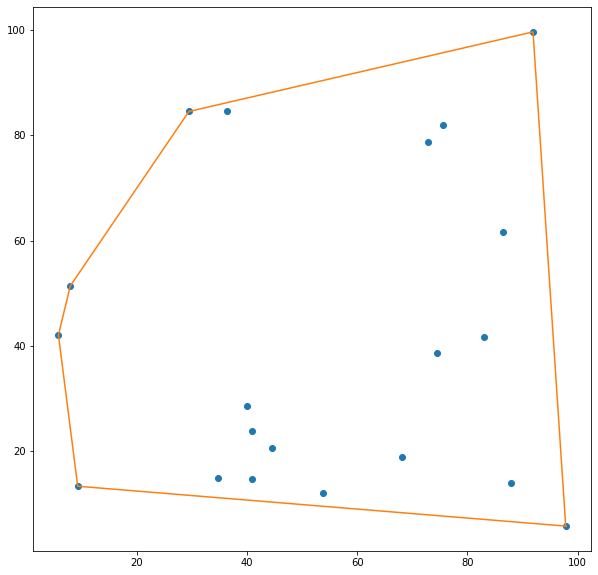

In [240]:
s1 = PolygonSample(vertices_small)
s1.draw()

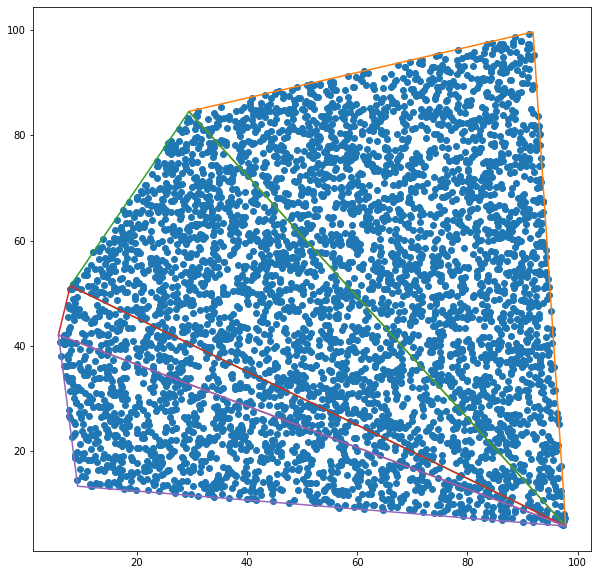

In [238]:
sample1 = s1.sample(5000, onDraw = True)

In [ ]:
Пример для большого числа вершин

In [230]:
ndots = 10000
vertices = [(random() * 100, random() * 100) for _ in range(ndots)]

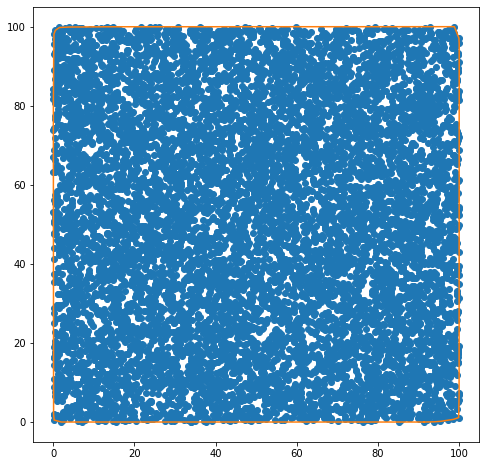

In [246]:
s = PolygonSample(vertices)
s.draw()

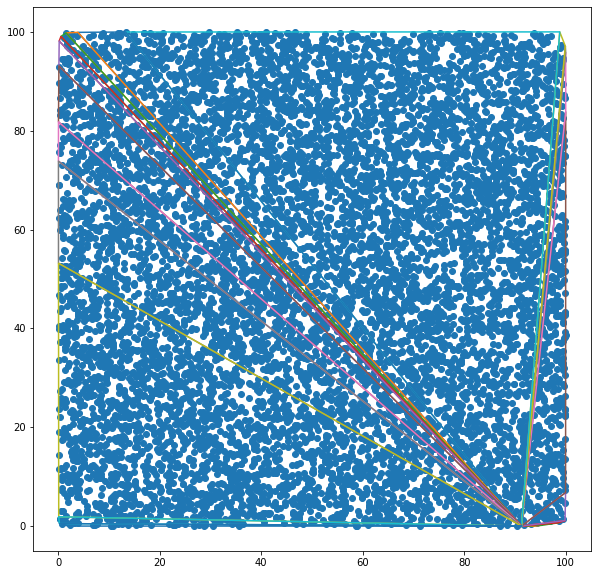

In [247]:
Sample = s.sample(10000, onDraw = True)